In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

seed = 1234

In [2]:
diabetes = datasets.load_diabetes(scaled=False)
diabetes

{'data': array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
        [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
        [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
        ...,
        [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
        [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
        [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51

In [3]:
diabetes.feature_names


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X = diabetes.data
Y = diabetes.target

In [6]:
X.shape, Y.shape


((442, 10), (442,))

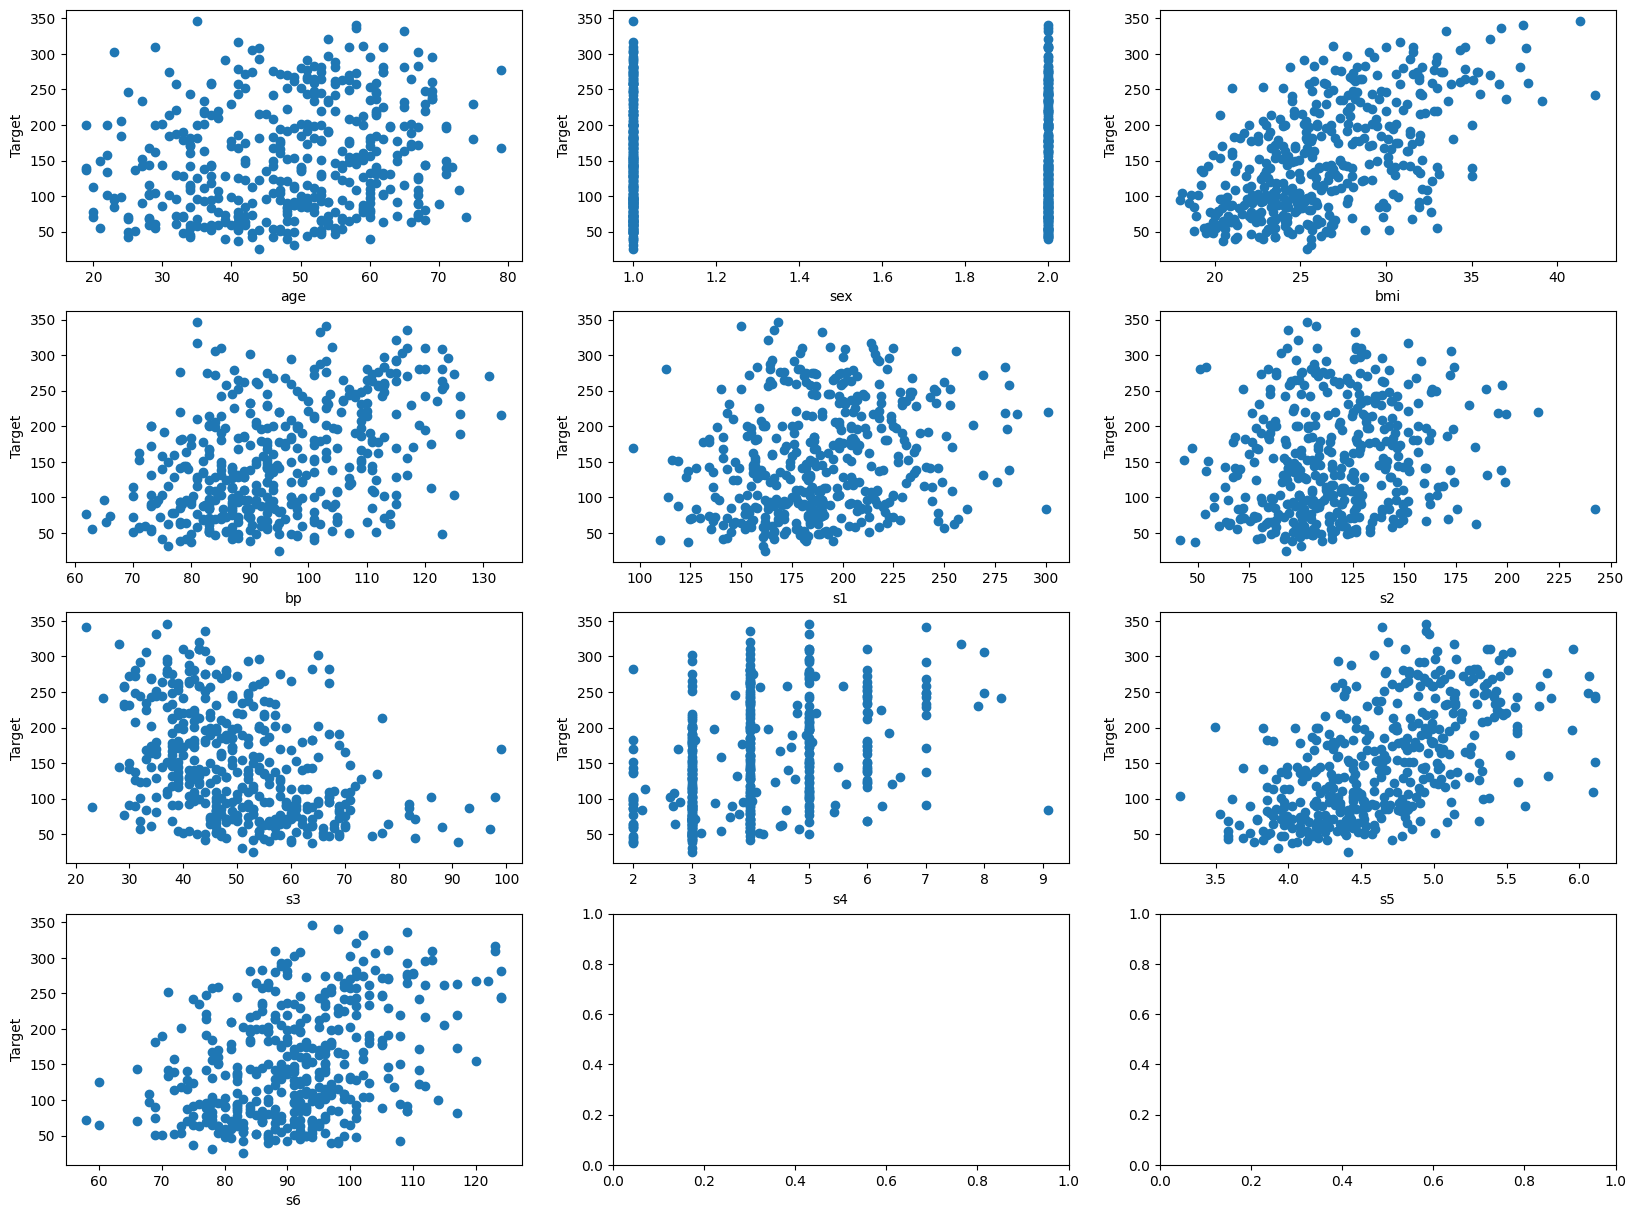

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
  if i==10:
    break
  ax.scatter(X[:, i], Y)
  ax.set_xlabel(diabetes.feature_names[i])
  ax.set_ylabel('Target')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=seed)

print(X_train.shape, X_val.shape, X_test.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)


(353, 10) (45, 10) (44, 10)
(353,) (45,) (44,)


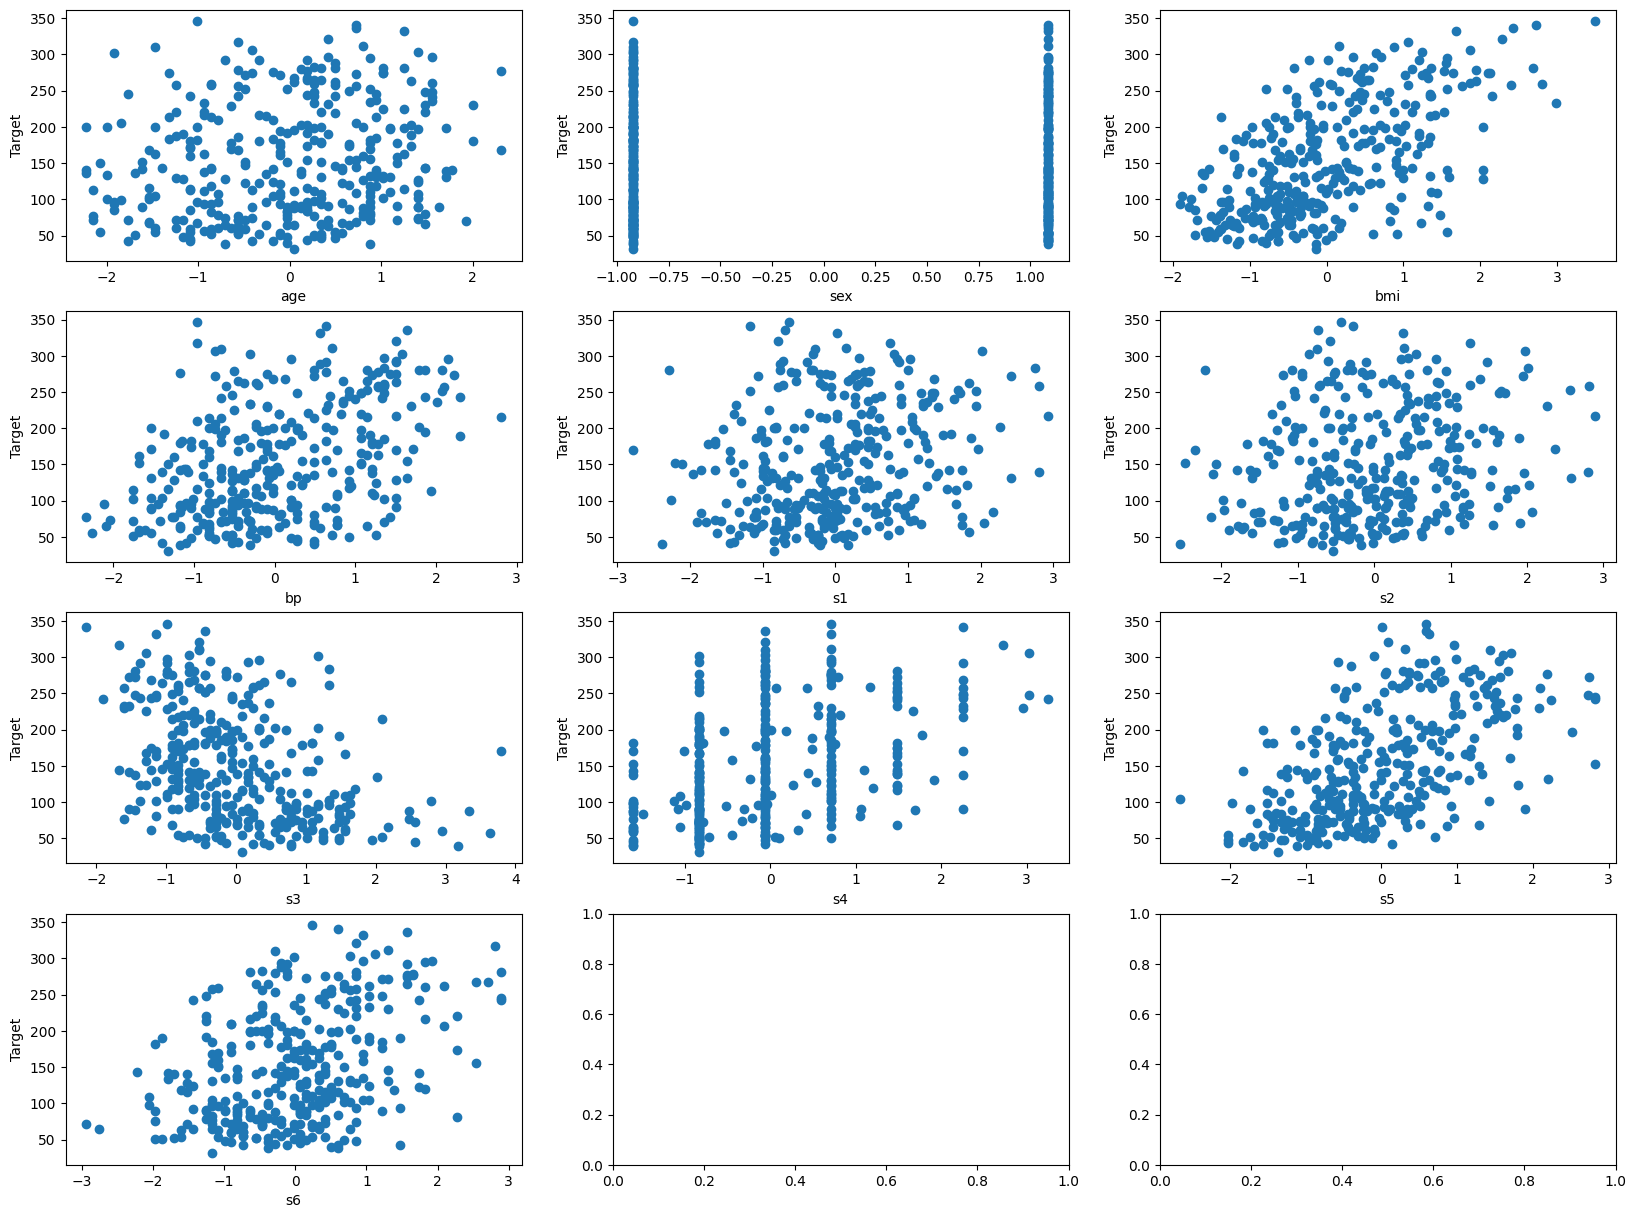

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
  if i==10:
    break
  ax.scatter(X_train[:, i], Y_train)
  ax.set_xlabel(diabetes.feature_names[i])
  ax.set_ylabel('Target')
plt.show()


In [49]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters= 500, seed = 1234):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.val_losses = []
        self.seed = seed

    def fit(self, X_train, y_train, X_val = None, y_val = None):
        np.random.set_state = self.seed
        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features)
        self.bias = 0

        for i in range(self.n_iters):
            self.train_losses.append(self.loss(X_train, y_train))
            self.val_losses.append(self.loss(X_val, y_val))

            y_pred = np.dot(X_train, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X_train.T, y_pred - y_train)
            db = (1 / num_samples) * np.sum(y_pred - y_train)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def loss(self, X, y):
      y_pred = self.predict(X)
      rmse = np.sqrt(mean_squared_error(y, y_pred))
      return rmse

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def metrics(self, X, y):
        y_pred = self.predict(X)
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        return r2, rmse


In [50]:
lrmodel = LinearRegression(lr = 0.01, n_iters= 1000)

In [51]:
lrmodel.fit(X_train, Y_train, X_val, Y_val)

In [52]:
r2_train, rmse_train = lrmodel.metrics(X_train, Y_train)
r2_val, rmse_val = lrmodel.metrics(X_val, Y_val)
r2_test, rmse_test = lrmodel.metrics(X_test, Y_test)


# Print the results
print("R2 for train data:", r2_train)
print("RMSE for train data:", rmse_train)
print("R2 for validation data:", r2_val)
print("RMSE for validation data:", rmse_val)
print("R2 for test data:", r2_test)
print("RMSE for test data:", rmse_test)

R2 for train data: 0.5217725056163902
RMSE for train data: 53.694486970983334
R2 for validation data: 0.3617117425458103
RMSE for validation data: 59.199803306950876
R2 for test data: 0.5456823966343203
RMSE for test data: 48.361692536170374


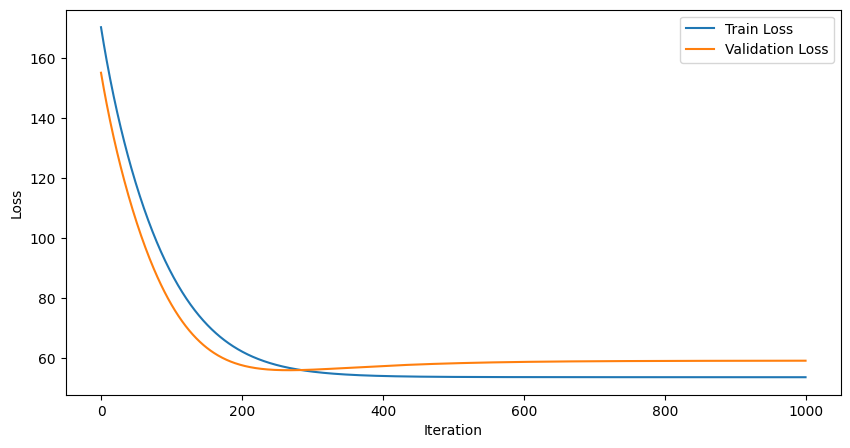

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(lrmodel.train_losses, label='Train Loss')
plt.plot(lrmodel.val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
lrs = [0.1, 0.01,0.05, 0.02, 0.07, 0.001]

for lr in lrs:
  lrmodel = LinearRegression(lr = lr, n_iters= 1000)
  lrmodel.fit(X_train, Y_train, X_val, Y_val)
  r2_train, rmse_train = lrmodel.metrics(X_train, Y_train)
  r2_val, rmse_val = lrmodel.metrics(X_val, Y_val)
  print(lr, r2_train, r2_val)


0.1 0.5256181229335488 0.3474391349507382
0.01 0.5218480062892499 0.36112769673711687
0.05 0.5241002108433719 0.3540768130385634
0.02 0.5224862881199255 0.35919261387079027
0.07 0.524850678442614 0.35113323300259924
0.001 -0.2977849985586769 -0.10600064985671076
